In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from numpy.linalg import norm

from random import seed
from random import randint
from sklearn.metrics import accuracy_score

pd.option_context('display.max_rows', None, 'display.max_columns', None)  # more options can be specified also
    
seed(1)

np.set_printoptions(precision=10)

%precision 10
!cp -r /content/drive/MyDrive/CS_480_680_DataSets /content

''' 
Dataset for K-nearest neighbour: knn-dataset.zip
Problem: this data is a modified version of the Optical Recognition of Handwritten Digits Dataset from the UCI repository. 
It contains pre-processed black and white images of the digits 5 and 6. 
Each attribute indicates how many pixels are black in a patch of 4 x 4 pixels.
Format: there is one row per image and one column per attribute. The class labels are 5 and 6.
The training set is already divided into 10 subsets for 10-fold cross validation.

http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Data Set Information:

We used preprocessing programs made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form. 
From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 
32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. 
This generates an input matrix of 8x8 where each element is an integer in the range 0..16. 
This reduces dimensionality and gives invariance to small distortions.

To sum up:
Each attribute indicates how many pixels are black in a patch of 4 x 4 pixels.
Input matrix of 8x8 where each element is an integer in the range 0..16. 

'''

' \nDataset for K-nearest neighbour: knn-dataset.zip\nProblem: this data is a modified version of the Optical Recognition of Handwritten Digits Dataset from the UCI repository. \nIt contains pre-processed black and white images of the digits 5 and 6. \nEach attribute indicates how many pixels are black in a patch of 4 x 4 pixels.\nFormat: there is one row per image and one column per attribute. The class labels are 5 and 6.\nThe training set is already divided into 10 subsets for 10-fold cross validation.\n\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nData Set Information:\n\nWe used preprocessing programs made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form. \nFrom a total of 43 people, 30 contributed to the training set and different 13 to the test set. \n32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. \nThis generates an input matrix

In [ ]:
# train.csv dataSet
train_1 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData1.csv', header=None)
train_2 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData2.csv', header=None)
train_3 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData3.csv', header=None)
train_4 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData4.csv', header=None)
train_5 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData5.csv', header=None)
train_6 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData6.csv', header=None)
train_7 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData7.csv', header=None)
train_8 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData8.csv', header=None)
train_9 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData9.csv', header=None)
train_10 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData10.csv', header=None)

# Labels dataSet
labels_1 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels1.csv', header=None)
labels_2 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels2.csv', header=None)
labels_3 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels3.csv', header=None)
labels_4 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels4.csv', header=None)
labels_5 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels5.csv', header=None)
labels_6 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels6.csv', header=None)
labels_7 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels7.csv', header=None)
labels_8 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels8.csv', header=None)
labels_9 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels9.csv', header=None)
labels_10 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels10.csv', header=None)

# Replace classes {'5' -> -1 and '6' -> 1}
replace_labels = {5: -1, 6: 1}
rename_features = {0: 'Label'}

labels_1.replace(replace_labels, inplace=True)
labels_2.replace(replace_labels, inplace=True)
labels_3.replace(replace_labels, inplace=True)
labels_4.replace(replace_labels, inplace=True)
labels_5.replace(replace_labels, inplace=True)
labels_6.replace(replace_labels, inplace=True)
labels_7.replace(replace_labels, inplace=True)
labels_8.replace(replace_labels, inplace=True)
labels_9.replace(replace_labels, inplace=True)
labels_10.replace(replace_labels, inplace=True)

labels_1.rename(columns=rename_features, inplace=True)
labels_2.rename(columns=rename_features, inplace=True)
labels_3.rename(columns=rename_features, inplace=True)
labels_4.rename(columns=rename_features, inplace=True)
labels_5.rename(columns=rename_features, inplace=True)
labels_6.rename(columns=rename_features, inplace=True)
labels_7.rename(columns=rename_features, inplace=True)
labels_8.rename(columns=rename_features, inplace=True)
labels_9.rename(columns=rename_features, inplace=True)
labels_10.rename(columns=rename_features, inplace=True)

In [ ]:
train_set = [train_1, train_2, train_3, train_4, train_5, train_6, train_7, train_8, train_9, train_10]
labels_set = [labels_1, labels_2, labels_3, labels_4, labels_5, labels_6, labels_7, labels_8, labels_9, labels_10]

In [ ]:
def get_rand():
  # This function return 1 or -1 at random, it's used to break ties in
  # KNN classifications
  rand_num = randint(-1, 1)
  
  if rand_num == 0:
    rand_num = get_rand()

  return rand_num
  

# K neighbors from 1 to 30 values sweep
k_neighbors = [i for i in range(1, 31)]

# Number of trainingdata splits
k_cross = 10

# list of concatenated dataFrames; labels and corresponding feature values
training_labels_list = []

# List of dataFrames of the training data execluding the training data used for validation 
training_data = []
training_labels = []

# Same for validation data
validation_data = []
validation_labels = []

# Get training data and validation data as list of dataFrames
for i in range(k_cross):
  sub_train = [train_set[index] for index in range(k_cross) if index != i]
  sub_label = [labels_set[index] for index in range(k_cross) if index != i]
  
  # Concatenate all dataframes in the sub_train list to a single dataframe in order
  # to get a single training examples dataFrame with all examples in it.
  training_data.append(pd.concat(sub_train, ignore_index=True))
  training_labels.append(pd.concat(sub_label, ignore_index=True))

  validation_data.append(train_set[i])
  validation_labels.append(labels_set[i])

In [ ]:
def predict_KNN(D, k, true_labels, x_hat):
  '''
  The function trains a KNN classifier using k as number of neighbors to
  check for the nearest neighbours around a point by measuring Euclidean distance (L2 norm) 

  Note that there actually is no “training” phase for K-nearest neighbors.

  Training is just a data memorization, so this function just calculates the L2 norm 
  and sorts the distances from the nearest to the furthest.

  At training time, we simply store the entire training set. 
  At test time, we get a test example x_hat. 
  To predict its label, we find the training example x that is most similar to x_hat.

  Since x is a training example, it has a corresponding label, y. 
  We predict that the label of ˆx is also y.

  Args: 
  K: number of nearest neighbors used to decide which label to assign the x_hat
  D: A dataframe that includes all training examples (x, y).
  x_hat: an example we want to predict its label

  Return: y_hat which is the label for the x_hat based on the k nearest neighbors

  '''
  # List of all L2 norm distances between x_hat and all training examples
  L2_Norm = {}

  # Calculate the Euclidean distance (L2 norm) between x_hat and all the examples
  for index, row in D.iterrows():
    L2_Norm[index] = norm(np.array(row) - np.array(x_hat))
  
  # Get the dictionary sorted
  ordered = {k: v for k, v in sorted(L2_Norm.items(), key=lambda item: item[1])}
  index_distance = list(ordered.items())

  # Get the estimation
  y_hat = 0
  
  for i in range(k):
    index = index_distance[i][0]
    distance = index_distance[i][1]
    y_hat = true_labels.at[index, 'Label'] + y_hat  


  # Make the classification
  if y_hat == 0:
    y_hat = get_rand()
  
  if y_hat >= 1:
    y_hat = 1
  
  if y_hat <= -1:
    y_hat = -1

  return y_hat

In [ ]:
y_estimate = []
accuracy = []
list_acc = []


# Select a certain k value for K neighbors
for k in k_neighbors:
  # Use 10-fold cross validation
  accuracy = []
  for iter in range (k_cross):
    y_estimate = []

    # Loop over all examples in the current data setting

    for index, row in validation_data[iter].iterrows():
      # Get the estimate of the validation data to get accuracy
      y_estimate.append(predict_KNN(training_data[iter], k, training_labels[iter], row))
  
    accuracy.append(accuracy_score(np.array(validation_labels[iter]), np.array(y_estimate)))

  print(np.sum(np.array(accuracy))/k_cross)
  list_acc.append(np.sum(np.array(accuracy))/k_cross)

0.745
0.734
0.7870000000000001
0.777
0.7859999999999999
0.767
0.7929999999999999
0.7879999999999999
0.806
0.8029999999999999
0.794
0.7939999999999999
0.795
0.799
0.795
0.806
0.808
0.8039999999999999
0.8140000000000001
0.8029999999999999
0.806
0.8160000000000001
0.808
0.8009999999999999
0.8019999999999999
0.8019999999999999
0.8029999999999999
0.806
0.8020000000000002
0.797


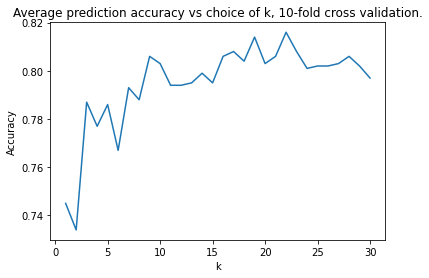

In [ ]:
plt.title("Average prediction accuracy vs choice of k, 10-fold cross validation.")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.plot(k_neighbors, list_acc)
plt.show()

In [ ]:
plot_me = {}
i = 0
for ind in list_acc:
  i += 1
  plot_me[i] = ind

  
ordered = {k: v for k, v in sorted(plot_me.items(), key=lambda item: item[1], reverse=True)}
plot_o = list(ordered.items())
print("Best K is at: ", plot_o[0][0], ", With Accuracy: ",  plot_o[0][1])

[(22, 0.8160000000000001), (19, 0.8140000000000001), (17, 0.808), (23, 0.808), (9, 0.806), (16, 0.806), (21, 0.806), (28, 0.806), (18, 0.8039999999999999), (10, 0.8029999999999999), (20, 0.8029999999999999), (27, 0.8029999999999999), (29, 0.8020000000000002), (25, 0.8019999999999999), (26, 0.8019999999999999), (24, 0.8009999999999999), (14, 0.799), (30, 0.797), (13, 0.795), (15, 0.795), (11, 0.794), (12, 0.7939999999999999), (7, 0.7929999999999999), (8, 0.7879999999999999), (3, 0.7870000000000001), (5, 0.7859999999999999), (4, 0.777), (6, 0.767), (1, 0.745), (2, 0.734)]
